In [2]:
import pandas as pd
import pandas_datareader as pdw
import numpy as np
from tqdm import tqdm

import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 300
plt.rcParams['figure.figsize'] = (15, 8)
plt.style.use('seaborn-white')

In [3]:
ibov_df = pdw.DataReader('^BVSP', data_source='yahoo', start='2005-01-01', end='2021-05-25')
ibov_df['retorno'] = ibov_df['Close'] / ibov_df['Close'].shift(1) - 1
ibov_df['x'] = ibov_df['retorno'] + 1
ibov_df.loc[:'2005-12-31', 'x'] = np.nan

start = str(ibov_df['x'].first_valid_index())[:10]
ibov_df.loc[start, 'x'] = ibov_df.loc[start, 'Close']

n = 1000
series = [i+1 for i in range(n)]

for i in series:
    ibov_df[i] = np.nan
    ibov_df.loc[start:, i].iloc[1:] = np.random.permutation(ibov_df.loc[start:].iloc[1:]['x'])

In [5]:
ibov_df.loc[start, series] = ibov_df.loc[start, 'Close']
ibov_df.loc[:, series] = ibov_df.loc[:, series].cumprod()

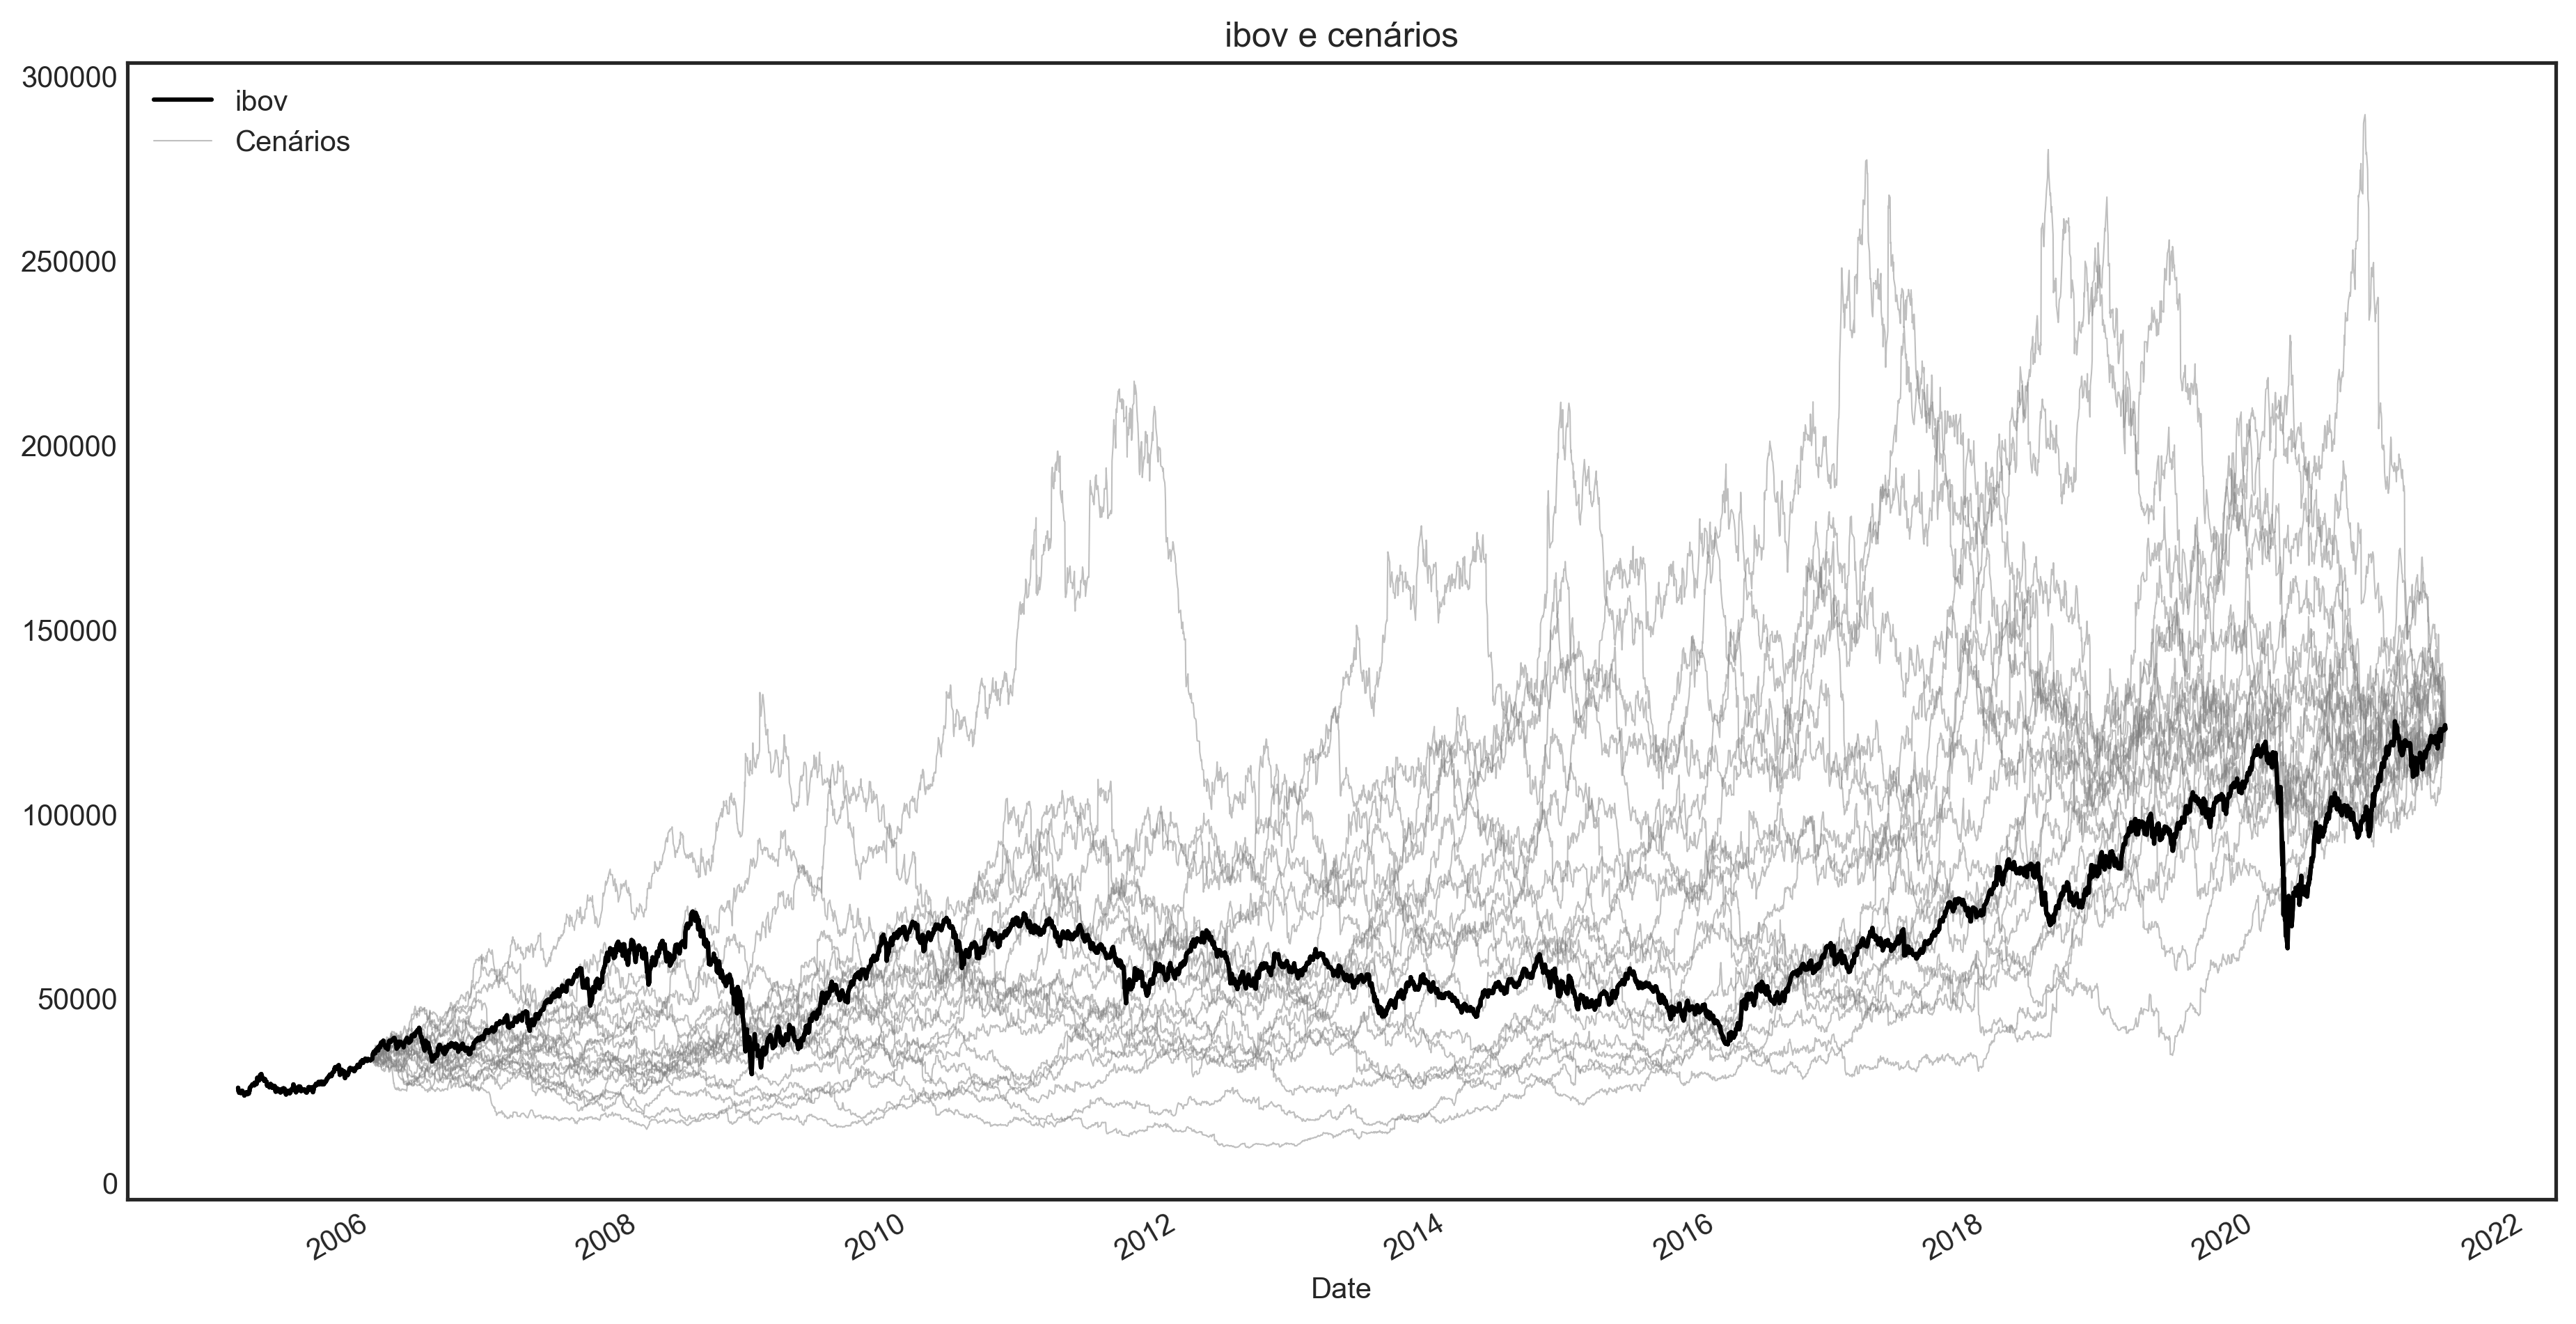

In [6]:
ax = ibov_df['Close'].plot(color='black', label='ibov', legend=True)
ibov_df[1].plot(ax=ax, color='grey', alpha=0.5, linewidth=0.5, label='Cenários', legend=True)
ibov_df[[i for i in range(11, 30)]].plot(ax=ax, color='grey', alpha=0.5, linewidth=0.5, legend=False)
ibov_df['Close'].plot(color='black', legend=False)
plt.title('ibov e cenários')
plt.savefig('simulacoes.png')

In [7]:
datas = list(ibov_df.index)
ini_mes = [str(datas[0])[:10]]

for d in range(1, len(datas)):
    m_1 = datas[d-1].month
    m_2 = datas[d].month

    if m_1 != m_2:
        ini_mes.append(str(datas[d])[:10])

In [8]:
precos = ibov_df.loc[ini_mes].dropna()[series]
precos = pd.concat([precos, ibov_df['Close'].loc[ini_mes]], axis=1)

compras = 1000 / precos
p_medio = (precos * compras).sum() / compras.sum()

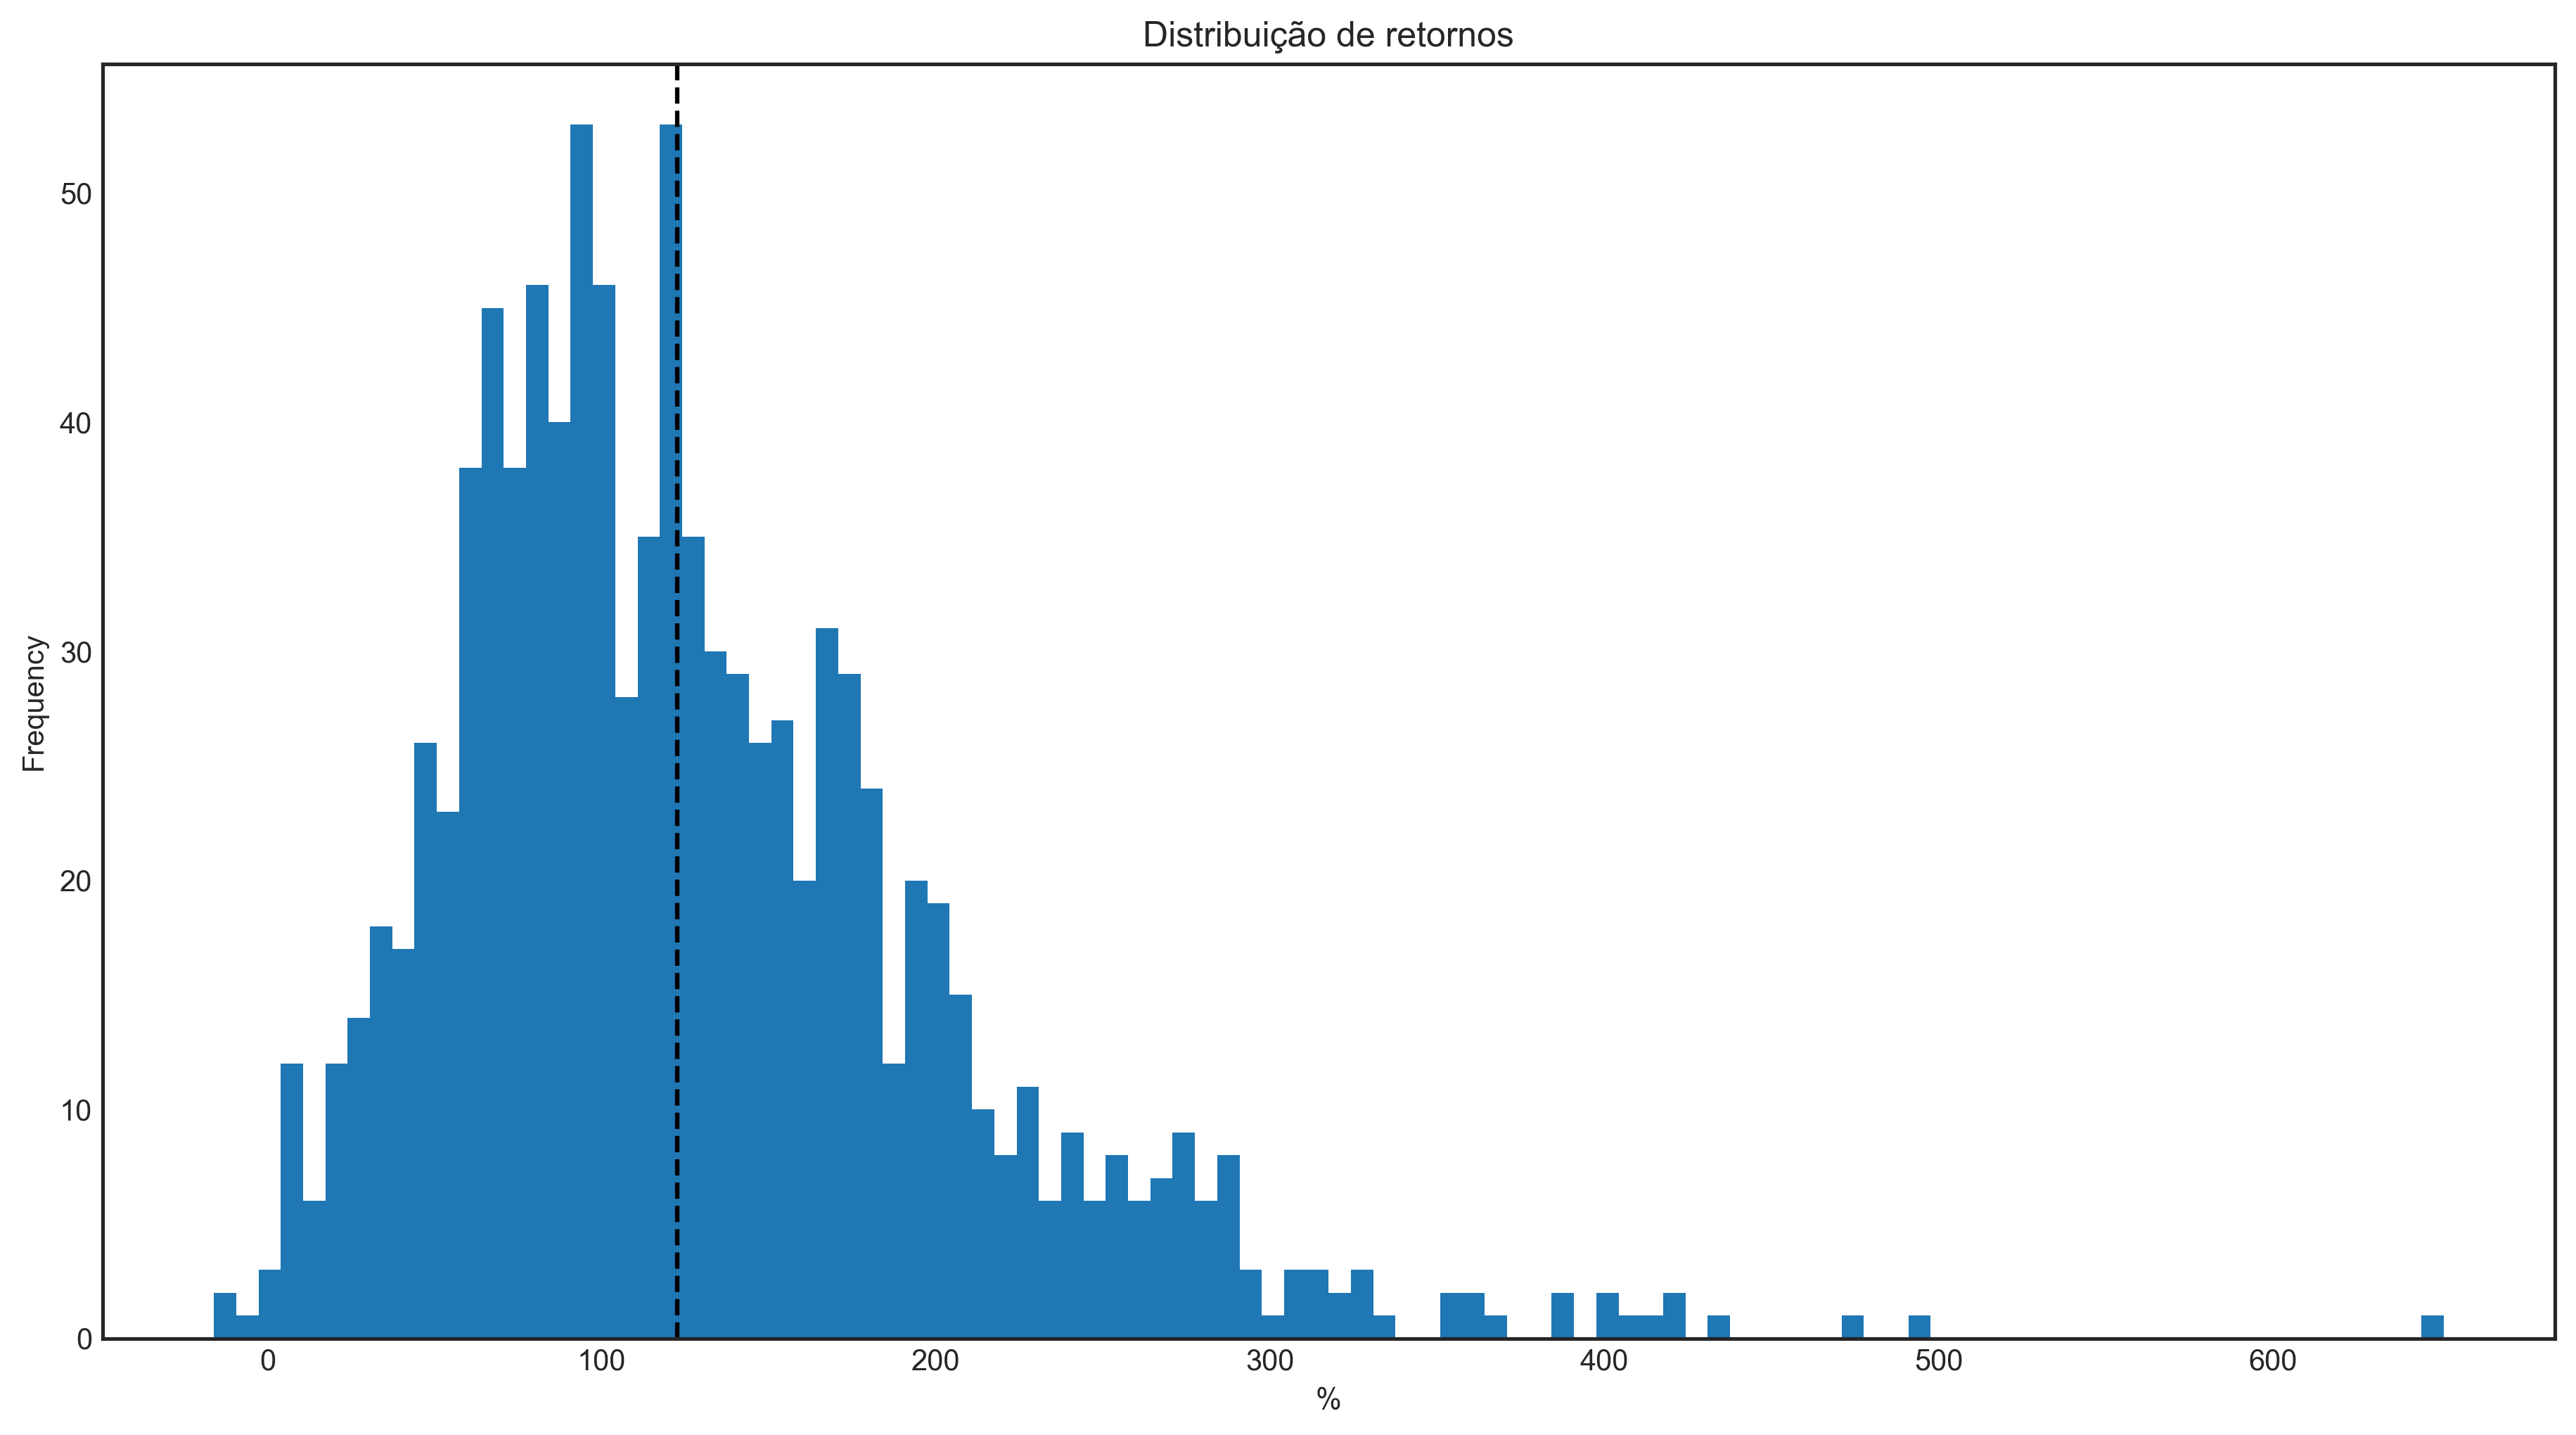

In [9]:
((ibov_df['Close'][-1] / p_medio.iloc[:-1] - 1) * 100).plot(kind='hist', bins=100)
plt.axvline((ibov_df['Close'][-1] / p_medio['Close'] - 1)*100, color='black', linestyle='--')
plt.title('Distribuição de retornos')
plt.xlabel('%')
plt.savefig('hist.png')